<a href="https://colab.research.google.com/github/MrRobot456/OTAMESI/blob/main/image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 3.1 実験準備

In [9]:
# 必要なライブラリのインポート
import os

from IPython.display import Image, display

import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

matplotlibで日本語を使うために、ライブラリをインストールしてインポートする。

In [10]:
!pip install japanize-matplotlib

In [11]:
# matplotlibの日本語化
import japanize_matplotlib
sns.set(font="IPAexGothic")
# 軸ラベル等の文字サイズを大きくする
sns.set_context('talk')

Googleドライブを接続し、実験結果等を自分のドライブに保存できるようにする。

認証を求める画面が出る場合がある。

In [12]:
# Googleドライブの接続
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
drive_path = '/content/drive/MyDrive'

Mounted at /content/drive


画像をダウンロードする。

In [13]:
%cd $drive_path
!wget https://www.gifu-nct.ac.jp/elec/ohashi/python/documents/docs/images/image/lena.png

/content/drive/MyDrive
--2024-12-12 03:54:20--  https://www.gifu-nct.ac.jp/elec/ohashi/python/documents/docs/images/image/lena.png
Resolving www.gifu-nct.ac.jp (www.gifu-nct.ac.jp)... 153.125.131.32
Connecting to www.gifu-nct.ac.jp (www.gifu-nct.ac.jp)|153.125.131.32|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 119043 (116K) [image/png]
Saving to: ‘lena.png.1’

lena.png.1          100%[===================>] 116.25K   183KB/s    in 0.6s    

2024-12-12 03:54:21 (183 KB/s) - ‘lena.png.1’ saved [119043/119043]



Googleドライブに`lena.png`が存在することを確認してもよい。

ダウンロードした画像を表示する。

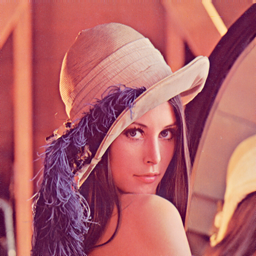

In [14]:
# 画像を読み込む
lena = cv2.imread(os.path.join(drive_path, "lena.png"))

# 画像を表示する
show_lena = cv2.imencode('.png', lena)[1]
display(Image(show_lena))

画像を表示するための一連のプログラムを**関数**としてまとめておく。

これにより、`cv2.imread()`関数で読み込んだ画像`img`を、`show_img(img)`で表示できる。

In [15]:
def imshow(img):
  show_img = cv2.imencode('.png', img)[1]
  display(Image(show_img))

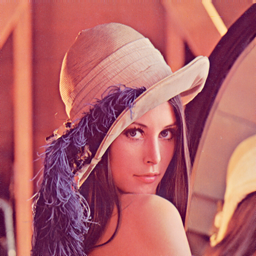

In [16]:
imshow(lena)

## 3.2 画像の情報取得

In [41]:
print(lena[50,50])
print(lena[150,150])
h, w, c = lena.shape
print(h, w, c)

[ 82  71 176]
[ 90  88 212]
256 256 3


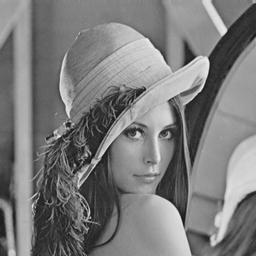

In [34]:
lena_gray = cv2.cvtColor(lena, cv2.COLOR_BGR2GRAY)
imshow(lena_gray)

In [43]:
print(lena_gray[50,50])
print(lena_gray[150,150])
h, w= lena_gray.shape
print(h, w)

104
125
256 256


In [38]:
cv2.imwrite(os.path.join(drive_path, "lena_gray.png"), lena_gray)

True

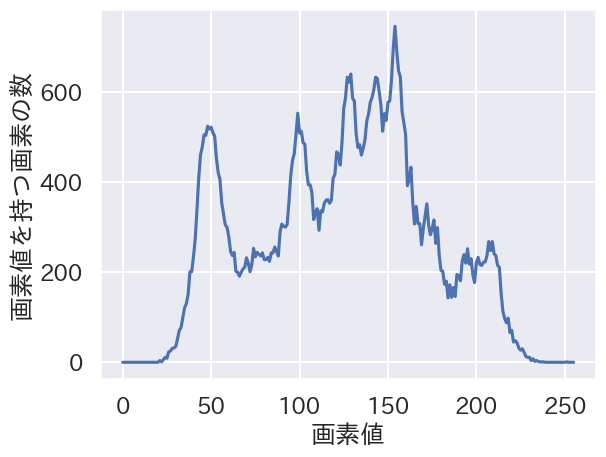

In [40]:
lena_hist = cv2.calcHist([lena_gray], [0], None, [256], [0, 256])

plt.xlabel("画素値")
plt.ylabel("画素値を持つ画素の数")

plt.plot(lena_hist)
plt.show()

## 3.3 画像の幾何変換

もし`h, w, c = lena_gray.shape`でエラーが出る場合、`h, w = lena_gray.shape`二変更する。

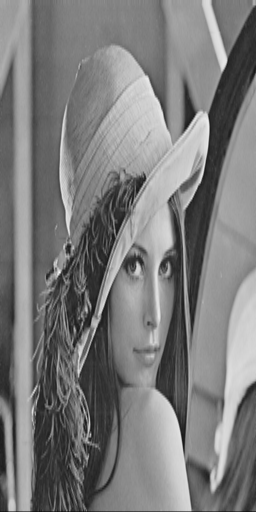

True

In [101]:
mat = np.float32([[1, 0, 0],
                  [0, 2, 0]])

h, w = lena_gray.shape
lena_tatenaga = cv2.warpAffine(lena_gray, mat, (w, 2*h))

imshow(lena_tatenaga)

cv2.imwrite(os.path.join(drive_path, "lena_t.png"), lena_tatenaga)

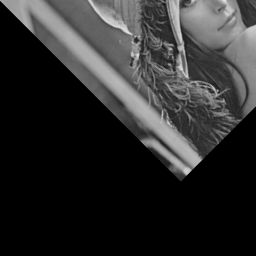

In [53]:
import math
mat = np.float32([[math.cos(math.radians(45)), math.sin(math.radians(45)), 0],
                  [-math.sin(math.radians(45)), math.cos(math.radians(45)), 0]])

h, w = lena_gray.shape
lena_translated = cv2.warpAffine(lena_gray, mat, (w, h))

imshow(lena_translated)

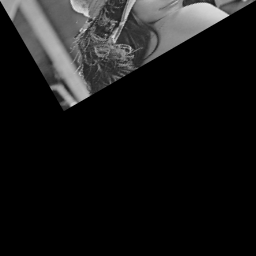

In [69]:
import math
mat = np.float32([[1, 0, 0],
                  [0, 0.5, 0]])

h, w = lena_gray.shape
lena_translated = cv2.warpAffine(lena_gray, mat, (w, h))

mat = np.float32([[math.cos(math.radians(30)), math.sin(math.radians(30)), 0],
                  [-math.sin(math.radians(30)), math.cos(math.radians(30)), 0]])

h, w = lena_gray.shape
lena_translatedd = cv2.warpAffine(lena_translated, mat, (w, h))

imshow(lena_translatedd)

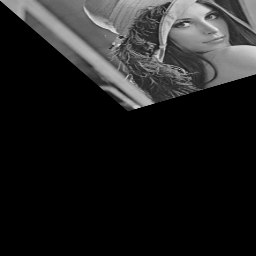

In [70]:
import math
mat = np.float32([[math.cos(math.radians(30)), math.sin(math.radians(30)), 0],
                  [-math.sin(math.radians(30)), math.cos(math.radians(30)), 0]])

h, w = lena_gray.shape
lena_translated = cv2.warpAffine(lena_gray, mat, (w, h))

mat = np.float32([[1, 0, 0],
                  [0, 0.5, 0]])

h, w = lena_gray.shape
lena_translatedd = cv2.warpAffine(lena_translated, mat, (w, h))

imshow(lena_translatedd)

## 3.4 線形フィルタ

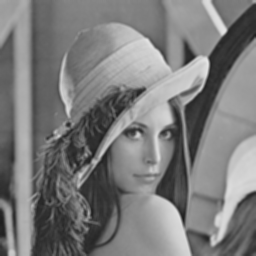

In [83]:
mat = np.float32([[1/9, 1/9, 1/9],
                  [1/9, 1/9, 1/9],
                  [1/9, 1/9, 1/9]])

lena_translated = cv2.filter2D(lena_gray, -1, mat)

imshow(lena_translated)

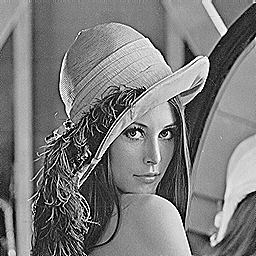

In [93]:
mat = np.float32([[0, -1, 0],
                  [-1, 5, -1],
                  [0, -1, 0]])

lena_translated = cv2.filter2D(lena_gray, -1, mat)

imshow(lena_translated)

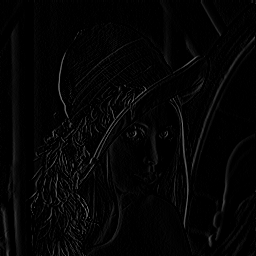

In [99]:
mat = np.float32([[0, 0, 0],
                  [0, -1, 1],
                  [0, 0, 0]])

lena_translated = cv2.filter2D(lena_gray, -1, mat)

imshow(lena_translated)